In [1]:
import numpy as np
import sympy as sym
import scipy as sp
import matplotlib.pyplot as plt

In [33]:
def rot(a):
    return np.array([np.cos(a), np.sin(a)])

In [34]:
rot(2*np.pi/3)

array([-0.5      ,  0.8660254])

In [35]:
# матриця координат базисних коренів, по стовпчикам
a1 = rot(0)
a2 = rot(2*np.pi / 3)
A = np.c_[a1,a2]
A

array([[ 1.       , -0.5      ],
       [ 0.       ,  0.8660254]])

In [12]:
def mdot(x,y):
    return 2*np.dot(x,y) / np.dot(y,y)

In [18]:
# Матриця Картана
C = np.zeros((2,2), dtype=np.float64)
for i in range(2):
    for j in range(2):
        C[i,j] = mdot(A[:,i],A[:,j])
C

array([[ 2., -1.],
       [-1.,  2.]])

In [19]:
C1 = np.linalg.inv(C).T
C1

array([[0.66666667, 0.33333333],
       [0.33333333, 0.66666667]])

In [39]:
W = A @ C1
W

array([[0.5       , 0.        ],
       [0.28867513, 0.57735027]])

In [22]:
for i in range(2):
    for j in range(2):
        print(f"<w_{i}, a_{j}> = ", mdot(W[:,i], A[:,j]))

<w_0, a_0> =  1.0
<w_0, a_1> =  5.551115123125784e-17
<w_1, a_0> =  0.0
<w_1, a_1> =  1.0000000000000002


In [47]:
def dual(a):
    return 2*a / np.dot(a,a)

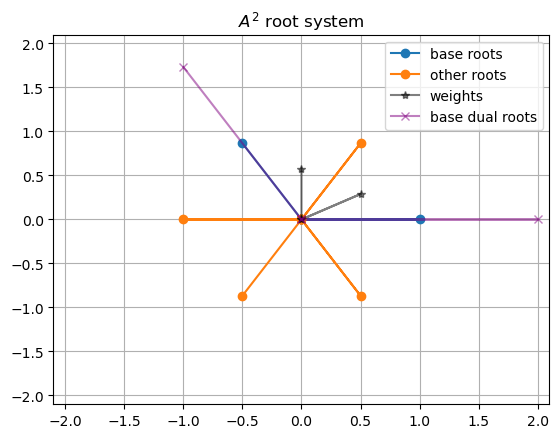

In [58]:
plt.xlim(-2.1,2.1)
plt.ylim(-2.1,2.1)
plt.grid()

line = []
for a in A.T:
    line.append(np.zeros(2))
    line.append(a)
plt.plot(*(np.array(line).T), '-o', label='base roots')

line = []
rootsystem = [a1+a2, -a1, -a2, -a1-a2]
for a in rootsystem:
    line.append(np.zeros(2))
    line.append(a)
plt.plot(*(np.array(line).T), '-o', label='other roots')

line = []
weights = W.T
for a in weights:
    line.append(np.zeros(2))
    line.append(a)
plt.plot(*(np.array(line).T), '-*', label='weights', c='black', alpha=0.5)

line = []
for a in A.T:
    line.append(np.zeros(2))
    line.append(dual(a))
plt.plot(*(np.array(line).T), '-x', label='base dual roots', c='purple', alpha=0.5)

plt.title("$A^2$ root system")
plt.legend()